## Chapter 9


## Bayes' Theorem and the task of statistical inference

### The task of statistical inference

For the moment, suppose that we are working with only one random variable $X:\Omega\rightarrow \mathbb{R}$.

We are trying to use the value of $X(\omega)$, where $\omega$ is the actual world, to get knowledge of what the distribution of $X$ is. 

In previous lectures we have focused on the cdf of $X$, but both it and its pdf determine the same information. Hence today let's consider trying to decide on what the pdf of $X$ is, i.e. the answer to the question "How probable is it that $X$ takes value $x$?"

Previously we were writing the pdf as $f$. In the Bayesian tradition, it is $\pi$ or $p$, and so we use $p$. 

We decide ahead of time that $X\sim p_{\theta}$, where $\theta$ comes from the parameter space $\Theta$ and where usually $\{p_{\theta}: \theta \in \Theta\}$ is some familar family like Bernoullis, Binomials, or Normals.

We're trying to figure out which of the $\theta$ from $\Theta$ is such that $X$ has pdf $p_{\theta}$.

### Vivifying Bayes' Theorem

You decide to solve the problem by outsourcing it.

**Likelihood**: You recruit a set $\Theta$ of experts (or peers, or sources), where each $\theta$ in $\Theta$ thinks that $X\sim p_{\theta}$. You think of $p_{\theta}(x)$ as how probable it is that $X=x$, assuming that $\theta$ was right, i.e. assuming that $X\sim p_{\theta}$. Hence, you write $p(x\mid \theta)=p_{\theta}(x)$ to indicate that it is the *likelihood* of $X=x$ conditional on $X\sim p_{\theta}$.

**Prior (probability of hypothesis)**: You yourself have some prior degrees of beliefs about which one of these experts is right. In particular, you have a probability measure $P$ on $\Theta$, called *the prior*. You write $p(\theta)=P(\{\theta\})$ for the probability that the hypothesis that $\theta$ was right.

**(Probability of) evidence**: You are seeking out evidence in the form of an observed event $X=x$. Prior to observation you assign the event $X=x$ probability $p(x)=\sum_{\theta\in \Theta} p(\theta)\cdot p(x\mid \theta)$, i.e. you take the expectation of the random variable $Y(\theta) = p(x\mid \theta)$. That's natural: after all, before you have updated, your views about the probability of $X=x$ are being outsourced to the experts and $p(x)$ is just averaging over their views according to the prior.

After observing some evidence $X(\omega)=x$ in the actual world $\omega$, you update on the event $X=x$. You're not gonna fire any of your experts for e.g. predicting that $X=x$ had low probability when it actually happened, since low probability events do happen. But you are use this information to update your degrees of belief about which one of the experts is right. 

**Posterior (probability of hypothesis)**: You update in accord with Bayes' Theorem to form the posterior $p(\theta \mid x)$, which is the probability you assign to "$\theta$ being right" after having observed the event $X=x$. Hence, you use the formula:

$$p(\theta \mid x) = \frac{p(x\mid \theta)\cdot p(\theta)}{p(x)}$$

which as per usual you remember in the mnemonic:

$$\mathrm{posterior} = \frac{\mathrm{likelihood}\times \mathrm{prior}}{\mathrm{evidence}}$$

*Note 1*: I am using "evidence" to help us adjust to this new application of Bayes' Theorem. A more common term is *marginal distribution* or *prior predicative distribution*.

*Note 2*: You might rightly wonder what the sample space is which makes this genuinely an application of Bayes' Theorem. See last section of this chapter.

### The components of Bayes' Theorem

Bayes' Theorem takes the following form in the context of statistical inference:

$$p(\theta \mid x) = \frac{p(x\mid \theta)\cdot p(\theta)}{p(x)}$$

which as per usual you remember in the mnemonic:

$$\mathrm{posterior} = \frac{\mathrm{likelihood}\times \mathrm{prior}}{\mathrm{evidence}}$$

Here is a compact summary of the components: 

| concept | notation | definition | how to find value |
|----------|----------|----------|----------|
| prior   | $p(\theta)$   |  prior degree of belief that $X\sim p_{\theta}$  | initially, consult your degrees of belief; after the initial round, the prior is the previous round's posterior |
| likelihood   | $p(x\mid \theta)$   | probability that $X=x$ conditional on $X\sim p_{\theta}$     | $p_{\theta}(x)$, i.e. input in $x$ to pdf $p_{\theta}$; look at graph or consult computer or book  |
| evidence (aka marginal, aka prior predictive distribution)  | $p(x)$  | probability that $X=x$  | use formula $p(x)=\sum_{\theta\in \Theta} p(\theta)\cdot p(x\mid \theta)$; in non-trivial cases use computer  |
| posterior  | $p(\theta \mid x)$  | probability that $X\sim p_{\theta}$ conditional on $X=x$  | Use Bayes' Theorem and three previous rows  |


### Advice on keeping the notation straight: 

When first encountering this perspective, the many distinct uses of $p$ can be confusing. 

The following remarks usually help one keep oneself straight: 

- We use $x$ to range over real numbers which the random variable $X$ is outputting

- We use $\theta$ to range over the parameter space $\Theta$.

- If you see $p_{\theta}$ with $\theta$ in subscript, this is the pdf associated to $\theta$

- The other options are $p(x\mid \theta), p(x), p(\theta\mid x)$. 

- The two written in conditional notation are conditional probabilities of $X=x$ conditional on $X\sim p_{\theta}$ and vice-versa. 

- The final one, $p(x)$, is given by the formula up above, and is what you think about the probability of $X=x$ before updating, namely by taking the expectation of the random variable $Y(\theta) = p(x\mid \theta)$.

## A simple example: uniform vs. three normals, plus prior which is uniform

You recruit four experts: $\theta_0, \theta_1, \theta_2, \theta_3$.

They are so-named because expert $\theta_i$ thinks tha $X\sim \theta_i$.

**Likelihood**: one of your experts $\theta_0$ uses the uniform measure and thinks that every outcome is equally likely. The other three $\theta_1, \theta_2, \theta_3$ think that the random variable's probability distribution accords with a normal distribution, but they disagree about what the mean and variance are.

**Prior**: you just hired these four experts and don't have much to go on, so you just say that it is equally likely that each is right. That is, you say each has $1/4$ chance of being right. Hence, you set:


In [3]:
my_prior_1 = [.25, .25, .25, .25]


**Evidence**: for all $x$, you diligently calculate the probability $p(x)=.25*p(x\mid \theta_0)+.25*p(x\mid \theta_1)+.25*p(x\mid \theta_2)+.25*p(x\mid \theta_4)$.

**Posterior**: you use Bayse' Theorem to calculate $p(\theta_0 \mid x), p(\theta_1 \mid x), p(\theta_2 \mid x), p(\theta_3 \mid x)$, which is is how probable you think it is that the experts are right, after you have seen how they preformed on this first piece of data.

### Visualizing a one-step application of Bayes' Theorem: the prominence of the prior


Below is the graph, and below it a little commentary, geared towards understanding the effects of the different components of Bayes' Theorem.

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from tabulate import tabulate
from IPython.display import display, Markdown
import matplotlib.pyplot as plt   # load pyplot package
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [5]:
# size_sample_space, size_parameter_space are positive integers
# prior is list of length size_parameter_space of non-negative numbers that sum to 1
# likelihood is a list of length size_parameter_space 
# where each element is a list of length size_sample_space numbers that sum to 1

def bayes(size_sample_space,size_parameter_space,prior,likelihood, print_table = True, observed_value = None, round_digits = 4):

    if not 0.98 <= sum(prior) <= 1.02:
        raise ValueError("The sum of the prior probabilities must be equal to 1")
    if len(prior) != size_parameter_space:
        raise ValueError("The length of the prior probabilities must be equal to the size of the parameter space")
    if len(likelihood) != size_parameter_space:
        raise ValueError("The length of the likelihood must be equal to the size of the parameter space")
    if any([len(likelihood[i]) != size_sample_space for i in range(size_parameter_space)]):
        raise ValueError("The length of each entry in the likelihood must be equal to the size of the sample space")
  

    sample_space = list(range(size_sample_space))

    parameter_space = list(range(size_parameter_space))



    parameter_space_names = []

    for i in parameter_space:
        parameter_space_names.append(f"likelihood p(x_j  &#124; θ_{i})")

    evidence =  []

    for j in sample_space:
        evidence.append(sum([prior[i]*likelihood[i][j] for i in parameter_space]))

    sample_space_names = []

    for j in sample_space:
        sample_space_names.append(f"x_{j}, evidence = {evidence[j].round(round_digits)}")

    df = pd.DataFrame(likelihood)

    df = df.T

    df.columns = parameter_space_names

    df.index = sample_space_names

    posterior = [[None]*size_sample_space for _ in range(size_parameter_space)]

    for i in parameter_space:
        for j in sample_space:
            posterior[i][j] = ((likelihood[i][j]*prior[i]) / evidence[j])

    for i in parameter_space:
        df.insert(2*i+1, f"posterior p(θ_ {i}  &#124; x_j)", posterior[i])


    parameter_space_names = []
    for i in parameter_space:
        parameter_space_names.append(f"likelihood p(x_j  &#124; θ_{i})")

    df2 = df.round(round_digits)

    if print_table:
        markdown_table = df2.to_markdown()

        display(Markdown(markdown_table))

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

    for i in parameter_space:
        axs[0].plot(sample_space, likelihood[i], label='θ_%i' % i)
    axs[0].plot(sample_space, evidence, '--', label='evidence')        
    axs[0].set_ylim(0, max(max(likelihood[0]), max(likelihood[1]))+.001)
    axs[0].set_title('likelihood p(x | θ)')
    axs[0].legend()
    axs[0].legend(loc='upper left')

    for i in parameter_space:
        axs[1].plot(sample_space, posterior[i], label='θ_%i' % i)
    if observed_value is not None:
        axs[1].axvline(x=observed_value, linestyle='--', label='observed value')       
    axs[1].set_ylim(0, 1.1)
    axs[1].set_title('posterior p(θ  | x)')
    axs[1].legend()
    axs[1].legend(loc='upper left')

    prior_suptitle = ['θ_%i = %1.2f' % (i,prior[i]) for i in parameter_space]
    prior_suptitle_string = ', '.join(prior_suptitle)

    fig.suptitle('likelihood vs. posterior with prior %s' % prior_suptitle_string)

    return posterior


In [6]:
def bayes_three_normal_vs_uniform(size_sample_space,prior, mean_1,var_1,mean_2,var_2,mean_3,var_3, observed_value = None, round_digits = 4):

    my_likelihood = [[None]*4 for _ in range(4)]

    my_likelihood[0] = [1/size_sample_space]*size_sample_space

    std_dev_1 = np.sqrt(var_1)
    std_dev_2 = np.sqrt(var_2)
    std_dev_3 = np.sqrt(var_3)

    my_min = min(mean_1 - 3*std_dev_1, mean_2 - 3*std_dev_2, mean_3 - 3*std_dev_3)
    my_max = max(mean_1 + 3*std_dev_1, mean_2 + 3*std_dev_2, mean_3 + 3*std_dev_3)

    my_sample_space_alt = np.linspace(my_min, my_max, size_sample_space)

    my_likelihood[1] = norm.pdf(my_sample_space_alt, mean_1, std_dev_1)
    my_likelihood[2] = norm.pdf(my_sample_space_alt, mean_2, std_dev_2)
    my_likelihood[3] = norm.pdf(my_sample_space_alt, mean_3, std_dev_3)

    bayes(size_sample_space,4,prior,my_likelihood, print_table = False, observed_value = observed_value)
    

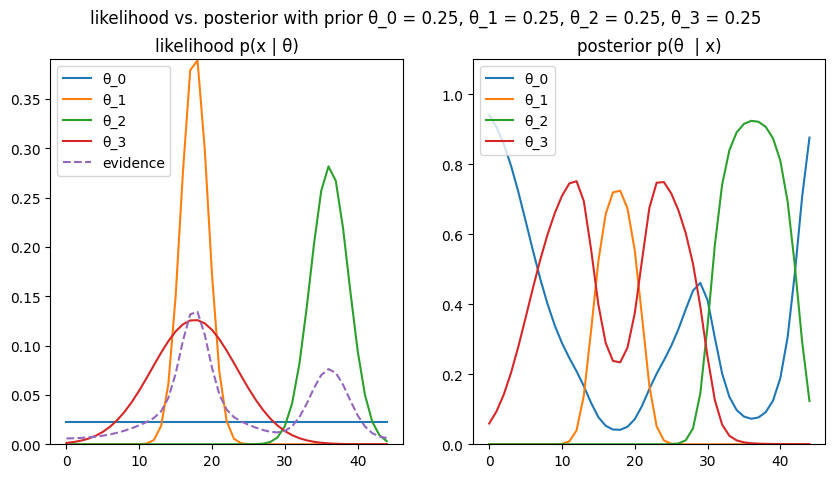

In [7]:
bayes_three_normal_vs_uniform(45, my_prior_1, 30.0, 1.0, 40.0, 2.0, 30.0, 10.0)

In the above graph, on the left we have:

- pdf of $\theta_0$ (blue) the uniform distribution, a straight line with low values for each entry
- pdf of $\theta_1\sim N(30, 1)$ (orange), $\theta_2\sim N(40, 2)$ (green), $\theta_3\sim N(30,10)$ (red) are the three normals
- the evidence $p(x)$, in the dashed line, which is just what your estimate of how probable $x$ is before you update

In the above graph, on the right we have:

- the posterior $p(\theta\mid x)$: once you fix an observed value $X=x$ on the $x$-axis, how probable it is that expert $\theta$ was right that $X\sim p_{\theta}$.

Note that the graph on the right is not a pdf of the sample space. Rather, if you fix an $x$-value, the value of the four lines at that $x$-value add up to one, and describe a pdf of the parameter space.

Note the following about the graphs:

- If one looks at $x=18$, one sees that the orange expert $\theta_1$ thought that the event $X=x$ was much higher than the red expert $\theta_3$. Since we think that each expert has a $1/4$ chance of being right and since the probability of the evidence doesn't differ between the experts, we see from Bayes' Theorem that the posterior of the orange expert $\theta_1$ is much higher than the posterior of the red expert $\theta_3$.

- If one looks at the shape of the orange expert $\theta_1$ between the graphs on the left and the right, they look kind of the same. But if one look at the shape of the red expert $\theta_3$, the graphs on the left and the right look really different. The explanation is that as we move closer to $x=18$, the probability $p(x)$ in the dashed line is getting large because the orange expert $\theta_1$ is thinking that it is so probable. Since we are dividing by this quantity in calculating the red $p(\theta_3\mid x)$, we are getting a smaller number. This doesn't happen for the orange $p(\theta_1\mid x)$ because the numerator also includes the large values of $p(x\mid \theta_1)$.

- Expert $\theta_0$ is adopting the uniform measure and thinks that all outcomes are equally likely. But note that the posterior $p(\theta_0\mid x)$ varies a whole lot depending on $x$. This is because this value is being affected, in Bayes' Theorem, by dividing by $p(x)$, which varies greatly with $x$.

Suppose now that you change the prior, say to:

In [8]:
my_prior_2 = [.5, .15, .30, .05]

That which one gets is the following:

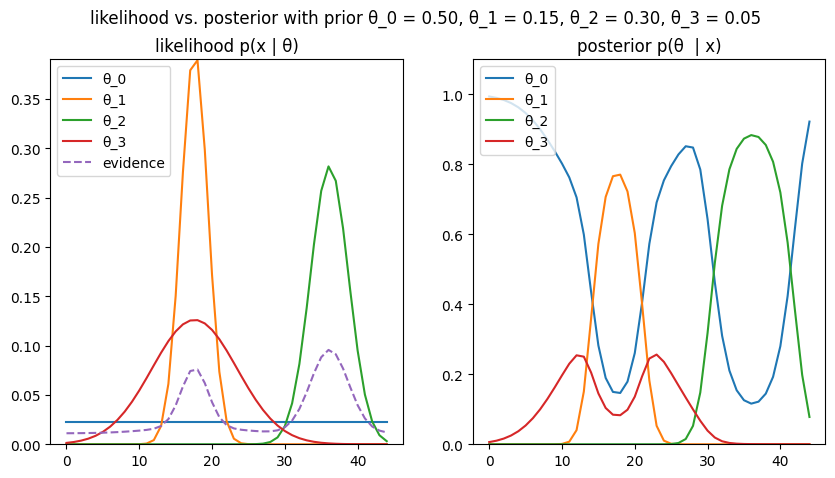

In [9]:
bayes_three_normal_vs_uniform(45, my_prior_2, 30.0, 1.0, 40.0, 2.0, 30.0, 10.0)

### Visualizing a n-step application of Bayes' Theorem: the washing out of the priors

Suppose that we observe many values and repeatedly apply Bayes' Theorem. 

For instance, suppose that we observe:

In [10]:
my_data = [30, 31, 32, 33, 32, 31, 30]

Then we can visualize what we think about our two experts, first with our original prior:

In [11]:
print('my_prior_1: ' + str(my_prior_1))

my_prior_1: [0.25, 0.25, 0.25, 0.25]


In [12]:
def bayes_pie(size_sample_space,size_parameter_space,prior,likelihood, observed_values):

    n = len(observed_values)

    parameter_space = list(range(size_parameter_space))

    fig, axs = plt.subplots(1, n+1, figsize=(10, 5)) 

    labels = ['θ_'+str(i) for i in range(size_parameter_space)]  

    prior_0 = prior

    prior_suptitle = ['θ_%i = %1.2f' % (i,prior_0[i]) for i in parameter_space]
    prior_suptitle_string = ', '.join(prior_suptitle)

    fig.suptitle('posterior_n for n≤%i, with prior %s' % (n,prior_suptitle_string))    

    axs[0].pie(prior)

    axs[0].set_title('prior')    

    for j in range(n):

        evidence = sum([prior[i]*likelihood[i][observed_values[j]] for i in range(size_parameter_space)])

        posterior = [prior[i]*likelihood[i][observed_values[j]]/evidence for i in range(size_parameter_space)]

        axs[j+1].pie(posterior)

        axs[j+1].set_title('posterior_'+str(j+1))

        prior = posterior

    fig.legend(labels, loc='center left')

    fig.subplots_adjust(top=1.25)

    return posterior

    

In [13]:
def bayes_pie_three_normal_vs_uniform(size_sample_space,prior, mean_1,var_1,mean_2,var_2,mean_3,var_3, observed_values):

    my_likelihood = [[None]*4 for _ in range(4)]

    my_likelihood[0] = [1/size_sample_space]*size_sample_space

    std_dev_1 = np.sqrt(var_1)
    std_dev_2 = np.sqrt(var_2)
    std_dev_3 = np.sqrt(var_3)

    my_min = min(mean_1 - 3*std_dev_1, mean_2 - 3*std_dev_2, mean_3 - 3*std_dev_3)
    my_max = max(mean_1 + 3*std_dev_1, mean_2 + 3*std_dev_2, mean_3 + 3*std_dev_3)

    my_sample_space_alt = np.linspace(my_min, my_max, size_sample_space)

    my_likelihood[1] = norm.pdf(my_sample_space_alt, mean_1, std_dev_1)
    my_likelihood[2] = norm.pdf(my_sample_space_alt, mean_2, std_dev_2)
    my_likelihood[3] = norm.pdf(my_sample_space_alt, mean_3, std_dev_3)

    bayes_pie(size_sample_space, 4, prior, my_likelihood, observed_values)
    

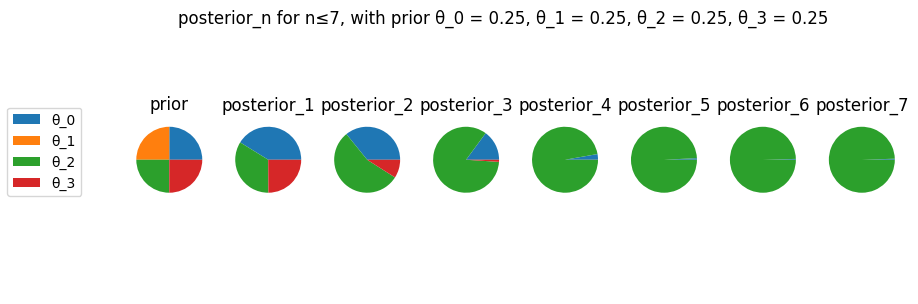

In [14]:
bayes_pie_three_normal_vs_uniform(45, my_prior_1, 30.0, 1.0, 40.0, 2.0, 30.0, 10.0, my_data)

And then with the alternative prior:

In [15]:
print('my_prior_2: ' + str(my_prior_2))

my_prior_2: [0.5, 0.15, 0.3, 0.05]


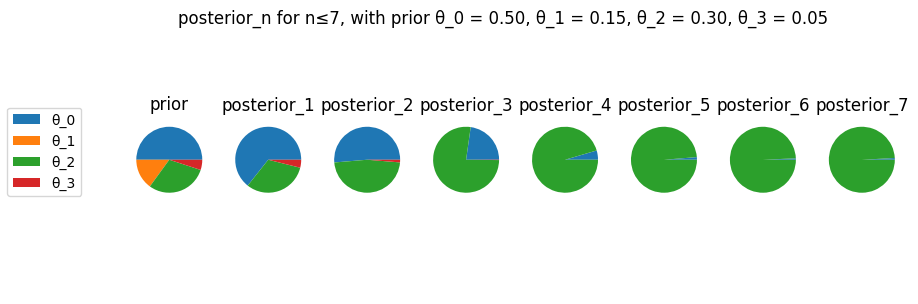

In [16]:
bayes_pie_three_normal_vs_uniform(45, my_prior_2, 30.0, 1.0, 40.0, 2.0, 30.0, 10.0, my_data)

## The sample space and probability measure in Bayes' Theorem



Suppose that $\Omega$ and $\Theta$ are finite.

Then $X:\Omega \rightarrow \mathbb{R}$ has finite range $x_1, \ldots, x_n$.

Let $R=\{x_1, \ldots, x_n\}$.

Consider the product space $R\times \Theta$. 

Define a probability measure $Pr$ on this space by $Pr(\{x_i\}\times \{\theta\})=p(\theta)\cdot p(x_i \mid \theta)$.

Let $x, \theta$ be fixed, and let $H_{\theta}=R\times \{\theta\}$ and let $E_{x}=\{x\}\times \Theta$. Then one has

- $Pr(H_{\theta})=p(\theta)$ because $Pr(H_{\theta})=Pr(R\times \{\theta\}) = \sum_{i=1}^n p(\theta)\cdot p(x_i \mid \theta) = p(\theta) \cdot ( \sum_{i=1}^n p_{\theta}(x_i) ) = p(\theta)$

- $Pr(E_{x}\mid H_{\theta})=p(x\mid \theta)$ because $Pr(E_{x}\mid H_{\theta}) = \frac{Pr(\{x\}\times \{\theta\})}{Pr(H_{\theta})} = \frac{p(\theta)\cdot p(x \mid \theta)}{p(\theta)} = p(x\mid \theta)$

- $Pr(E_{x})=p(x)$ because $Pr(E_{x})=Pr(\{x\}\times \Theta)=\sum_{\theta\in \Theta} Pr(\{x\}\times \{\theta\})=\sum_{\theta\in \Theta} p(\theta)\cdot p(x \mid \theta)=p(x)$

- $Pr(H_{\theta} \mid E_{x})=\frac{p(\theta)\cdot p(x \mid \theta)}{p(x)}$ either by Bayes' Theorem from the previous lines, or by direct calculation from $Pr(H_{\theta} \mid E_{x})=\frac{Pr(\{x\}\times \{\theta\})}{Pr(E_{x})} = \frac{p(\theta)\cdot p(x \mid \theta)}{p(x)}$.

Hence if we then define $p(\theta\mid x)=Pr(H_{\theta} \mid E_{x})$, then we get the desired result that 

$$p(\theta\mid x) =\frac{p(\theta)\cdot p(x \mid \theta)}{p(x)}$$